# <font color=red> Sentiment Analysis

In [ ]:
# read file
chase_rev = pd.read_csv("2015-2021_Chase_Rev.csv")


In [ ]:
sentiment = []
for x in range (0, len(chase_rev)):
    if chase_rev['rating'][x] <= 3:
        sentiment.append(1)
    if chase_rev['rating'][x] > 3:
        sentiment.append(0)

In [ ]:
 chase_rev['sentiment'] = sentiment

In [ ]:
 chase_rev

,Unnamed: 0,user,date,title,text,rating,year,month,sentiment
0,0,dangityourecute,2018-08-31,I love the chase app,I’ve been using the app for over 4 years now a...,5,2018,8,0
1,1,*dude1.0*,2020-06-17,Terrible Customer Service and App,"First of all I rarely leave negative reviews, ...",1,2020,6,1
2,2,cdjewell.net,2021-03-07,Great but missing one key feature,I have an embarrassing number of Chase account...,4,2021,3,0
3,3,Zoeyxoxoxo,2020-06-03,If I could I’d put no stars,This app is TRASH. Matter of fact throw out th...,1,2020,6,1
4,4,Serge s...,2020-07-07,"It's excellent, packed with technology",I have done a review of the chase app over a y...,5,2020,7,0
...,...,...,...,...,...,...,...,...,...
53663,53663,Csmithincin,2015-10-05,"Reliable, innovative and user friendly","Reliable, innovative and user friendly. Best b...",5,2015,10,0
53664,53664,Adam sefchovich,2015-10-05,Great app,Wish it included more rewards information rega...,5,2015,10,0
53665,53665,Goofy4u21,2015-10-04,Amazing,Chase app has gotten better and better. Love t...,5,2015,10,0
53666,53666,rmb317,2015-10-04,Terrific!,Great app! Very user-friendly and very few iss...,5,2015,10,0


In [ ]:
chase_rev = chase_rev[['month','year','text','sentiment']]

In [ ]:
chase_rev = chase_rev.rename(columns = {'text':'review'})

In [ ]:
chase_rev.head()

,month,year,review,sentiment
0,8,2018,I’ve been using the app for over 4 years now a...,0
1,6,2020,"First of all I rarely leave negative reviews, ...",1
2,3,2021,I have an embarrassing number of Chase account...,0
3,6,2020,This app is TRASH. Matter of fact throw out th...,1
4,7,2020,I have done a review of the chase app over a y...,0


## <font color=orange> Performance Comparisons

### <font color=purple> 1. Bing Liu's Lexicon Approach

In [ ]:
def count_pos_neg(data, positive_dict, negative_dict):
# count of positive and negative words that appeared in each message
# net count which is calculated by positive count subtracting negative count. 
    poscnt = []
    negcnt = []
    netcnt = []

    for nrow in range(0,len(data)):
        text = data[nrow]
        
        qa = 0
        qb = 0

        for word in positive_dict :
            if (word in text) :
                qa = qa + 1

        for word in negative_dict :
            if (word in text) :
                qb = qb + 1

        qc = qa - qb

        poscnt.append(qa)
        negcnt.append(qb)
        netcnt.append(qc)

    return (poscnt, negcnt, netcnt)

In [ ]:
#import Bing Liu's dictionary
from nltk.corpus import opinion_lexicon

In [ ]:
pos_list_BL=set(opinion_lexicon.positive())
neg_list_BL=set(opinion_lexicon.negative())

In [ ]:
chase_rev['poscnt_BL'], chase_rev['negcnt_BL'], chase_rev['netcnt_BL'] = count_pos_neg(chase_rev['review'], pos_list_BL, neg_list_BL)



In [ ]:
chase_rev[['review','poscnt_BL','negcnt_BL','netcnt_BL']].head(5)

,review,poscnt_BL,negcnt_BL,netcnt_BL
0,I’ve been using the app for over 4 years now a...,6,15,-9
1,"First of all I rarely leave negative reviews, ...",9,24,-15
2,I have an embarrassing number of Chase account...,5,16,-11
3,This app is TRASH. Matter of fact throw out th...,4,15,-11
4,I have done a review of the chase app over a y...,12,19,-7


###  <font color=purple> 2. LM Dictionary Approach

In [ ]:
def read_local_dictionary(file):
    # create dictionary list
    words_dict = []
    with open(file, "r") as f: 
        for line in f:
            t = line.strip().lower()
            words_dict.append(t)
    return words_dict

In [ ]:
pos_list_LM = read_local_dictionary('positive-words-LM.txt')
neg_list_LM = read_local_dictionary('negative-words-LM.txt')

In [ ]:
chase_rev['poscnt_LM'], chase_rev['negcnt_LM'], chase_rev['netcnt_LM'] = count_pos_neg(chase_rev['review'], pos_list_LM, neg_list_LM)


In [ ]:
chase_rev[['review','poscnt_LM','negcnt_LM','netcnt_LM']].head(5)

,review,poscnt_LM,negcnt_LM,netcnt_LM
0,I’ve been using the app for over 4 years now a...,4,8,-4
1,"First of all I rarely leave negative reviews, ...",2,16,-14
2,I have an embarrassing number of Chase account...,2,4,-2
3,This app is TRASH. Matter of fact throw out th...,2,5,-3
4,I have done a review of the chase app over a y...,5,4,1


###  <font color=purple> 3. TextBlob Approach

In [ ]:
from textblob import TextBlob

In [ ]:
chase_rev["score_TextBlob"] = chase_rev["review"].map(lambda x:TextBlob(x).sentiment.polarity)


In [ ]:
chase_rev[["review","score_TextBlob"]].head(5)

,review,score_TextBlob
0,I’ve been using the app for over 4 years now a...,0.203438
1,"First of all I rarely leave negative reviews, ...",-0.114102
2,I have an embarrassing number of Chase account...,-0.018920
3,This app is TRASH. Matter of fact throw out th...,-0.158889
4,I have done a review of the chase app over a y...,0.256793


###  <font color=purple> 4. Vader Approach

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()
scores = [analyzer.polarity_scores(sentence) for sentence in chase_rev['review']]

In [ ]:
neg_s = [i["neg"] for i in scores]
neu_s = [i["neu"] for i in scores]
pos_s = [i["pos"] for i in scores]
compound_s = [i["compound"] for i in scores]

In [ ]:
chase_rev['negscore_Vader'], chase_rev['neuscore_Vader'], chase_rev['posscore_Vader'], chase_rev['compound_Vader'] = neg_s, neu_s, pos_s, compound_s


In [ ]:
chase_rev[['review','negscore_Vader','neuscore_Vader','posscore_Vader','compound_Vader']].head(5)


,review,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,I’ve been using the app for over 4 years now a...,0.029,0.863,0.108,0.9309
1,"First of all I rarely leave negative reviews, ...",0.144,0.828,0.028,-0.9828
2,I have an embarrassing number of Chase account...,0.042,0.836,0.122,0.9455
3,This app is TRASH. Matter of fact throw out th...,0.132,0.847,0.021,-0.9864
4,I have done a review of the chase app over a y...,0.050,0.762,0.188,0.9839


### <font color=green> Eval

In [ ]:
true = chase_rev['sentiment']

In [ ]:
BL_pred = []
for x in range(0,len(chase_rev)):
    if chase_rev.netcnt_BL[x] < 0:
        BL_pred.append(0)
    else:
        BL_pred.append(1)
        
LM_pred = []
for x in range(0,len(chase_rev)):
    if chase_rev.netcnt_LM[x] < 0:
        LM_pred.append(0)
    else:
        LM_pred.append(1)
        
TB_pred = []
for x in range(0,len(chase_rev)):
    if chase_rev.score_TextBlob[x] < 0:
        TB_pred.append(0)
    else:
        TB_pred.append(1)
        
V_pred = []
for x in range(0,len(chase_rev)):
    if chase_rev.compound_Vader[x] < 0:
        V_pred.append(0)
    else:
        V_pred.append(1)

In [ ]:
chase_rev['v_pred'] = V_pred

In [ ]:
chase_rev.head()

,month,year,review,sentiment,poscnt_BL,negcnt_BL,netcnt_BL,poscnt_LM,negcnt_LM,netcnt_LM,score_TextBlob,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,v_pred
0,8,2018,I’ve been using the app for over 4 years now a...,0,6,15,-9,4,8,-4,0.203438,0.029,0.863,0.108,0.9309,1
1,6,2020,"First of all I rarely leave negative reviews, ...",1,9,24,-15,2,16,-14,-0.114102,0.144,0.828,0.028,-0.9828,0
2,3,2021,I have an embarrassing number of Chase account...,0,5,16,-11,2,4,-2,-0.018920,0.042,0.836,0.122,0.9455,1
3,6,2020,This app is TRASH. Matter of fact throw out th...,1,4,15,-11,2,5,-3,-0.158889,0.132,0.847,0.021,-0.9864,0
4,7,2020,I have done a review of the chase app over a y...,0,12,19,-7,5,4,1,0.256793,0.050,0.762,0.188,0.9839,1


In [ ]:
chase_rev = chase_rev[['month','year','review','v_pred']]

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#BL
BL_avg_prec = precision_score(true, BL_pred, average='weighted')
BL_pos_prec = precision_score(true, BL_pred, average=None, zero_division=1)[1]
BL_neg_prec = precision_score(true, BL_pred, average=None, zero_division=1)[0]
BL_avg_recall = recall_score(true, BL_pred, average='weighted')
BL_pos_recall = recall_score(true, BL_pred, average=None, zero_division=1)[1]
BL_neg_recall = recall_score(true, BL_pred, average=None, zero_division=1)[0]
BL_avg_F = f1_score(true, BL_pred, average='weighted')
BL_pos_F = f1_score(true, BL_pred, average=None, zero_division=1)[1]
BL_neg_F = f1_score(true, BL_pred, average=None, zero_division=1)[0]

#LM
LM_avg_prec = precision_score(true, LM_pred, average='weighted')
LM_pos_prec = precision_score(true, LM_pred, average=None, zero_division=1)[1]
LM_neg_prec = precision_score(true, LM_pred, average=None, zero_division=1)[0]
LM_avg_recall = recall_score(true, LM_pred, average='weighted')
LM_pos_recall = recall_score(true, LM_pred, average=None, zero_division=1)[1]
LM_neg_recall = recall_score(true, LM_pred, average=None, zero_division=1)[0]
LM_avg_F = f1_score(true, LM_pred, average='weighted')
LM_pos_F = f1_score(true, LM_pred, average=None, zero_division=1)[1]
LM_neg_F = f1_score(true, LM_pred, average=None, zero_division=1)[0]

#TB
TB_avg_prec = precision_score(true, TB_pred, average='weighted')
TB_pos_prec = precision_score(true, TB_pred, average=None, zero_division=1)[1]
TB_neg_prec = precision_score(true, TB_pred, average=None, zero_division=1)[0]
TB_avg_recall = recall_score(true, TB_pred, average='weighted')
TB_pos_recall = recall_score(true, TB_pred, average=None, zero_division=1)[1]
TB_neg_recall = recall_score(true, TB_pred, average=None, zero_division=1)[0]
TB_avg_F = f1_score(true, TB_pred, average='weighted')
TB_pos_F = f1_score(true, TB_pred, average=None, zero_division=1)[1]
TB_neg_F = f1_score(true, TB_pred, average=None, zero_division=1)[0]

#V
V_avg_prec = precision_score(true, V_pred, average='weighted')
V_pos_prec = precision_score(true, V_pred, average=None, zero_division=1)[1]
V_neg_prec = precision_score(true, V_pred, average=None, zero_division=1)[0]
V_avg_recall = recall_score(true, V_pred, average='weighted')
V_pos_recall = recall_score(true, V_pred, average=None, zero_division=1)[1]
V_neg_recall = recall_score(true, V_pred, average=None, zero_division=1)[0]
V_avg_F = f1_score(true, V_pred, average='weighted')
V_pos_F = f1_score(true, V_pred, average=None, zero_division=1)[1]
V_neg_F = f1_score(true, V_pred, average=None, zero_division=1)[0]

### <font color=green> Put into Dataframes

In [ ]:
d = {'Approach': ["Bing Liu", "LM","Textblob","Vader"], 
     'Precision':[BL_avg_prec,LM_avg_prec,TB_avg_prec,V_avg_prec],
     'Recall':[BL_avg_recall,LM_avg_recall,TB_avg_recall,V_avg_recall],
     'F Measure':[BL_avg_F,LM_avg_F,TB_avg_F,V_avg_F]}

In [ ]:
evals1 = pd.DataFrame(data=d)

In [ ]:
evals1

,Approach,Precision,Recall,F Measure
0,Bing Liu,0.755460,0.708392,0.725168
1,LM,0.745906,0.716814,0.728551
2,Textblob,0.798994,0.816557,0.796406
3,Vader,0.810200,0.824793,0.810060


In [ ]:
p = {'Approach': ["Bing Liu", "LM","Textblob","Vader"], 
     'Positive Precision':[BL_pos_prec,LM_pos_prec,TB_pos_prec,V_pos_prec],
     'Negative Precision':[BL_neg_prec,LM_neg_prec,TB_neg_prec,V_neg_prec],
     'Average Precision':[BL_avg_prec,LM_avg_prec,TB_avg_prec,V_avg_prec]}

In [ ]:
precs1 = pd.DataFrame(data=p)

In [ ]:
precs1

,Approach,Positive Precision,Negative Precision,Average Precision
0,Bing Liu,0.859154,0.395322,0.755460
1,LM,0.846492,0.396561,0.745906
2,Textblob,0.839278,0.659081,0.798994
3,Vader,0.851118,0.668092,0.810200


In [ ]:
r = {'Approach': ["Bing Liu", "LM","Textblob","Vader"], 
     'Positive Recall':[BL_pos_recall,LM_pos_recall,TB_pos_recall,V_pos_recall],
     'Negative Recall':[BL_neg_recall,LM_neg_recall,TB_neg_recall,V_neg_recall],
     'Average Recall':[BL_avg_recall,LM_avg_recall,TB_avg_recall,V_avg_recall]}

In [ ]:
recalls1 = pd.DataFrame(data=r)

In [ ]:
recalls1

,Approach,Positive Recall,Negative Recall,Average Recall
0,Bing Liu,0.746868,0.574762,0.708392
1,LM,0.776002,0.511252,0.716814
2,Textblob,0.944636,0.371729,0.816557
3,Vader,0.938517,0.429822,0.824793


In [ ]:
f = {'Approach': ["Bing Liu", "LM","Textblob","Vader"], 
     'Positive F':[BL_pos_F,LM_pos_F,TB_pos_F,V_pos_F],
     'Negative F':[BL_neg_F,LM_neg_F,TB_neg_F,V_neg_F],
     'Average F':[BL_avg_F,LM_avg_F,TB_avg_F,V_avg_F]}

In [ ]:
fs1 = pd.DataFrame(data=f)

In [ ]:
fs1

,Approach,Positive F,Negative F,Average F
0,Bing Liu,0.799086,0.468446,0.725168
1,LM,0.809716,0.446661,0.728551
2,Textblob,0.888846,0.475353,0.796406
3,Vader,0.892683,0.523102,0.810060


# <font color=orange> Frequency By Sentiment

## <font color=green> Negative Sentiment

In [ ]:
neg_oct = chase_rev[(chase_rev["month"] == 10)&(chase_rev['year'] == 2020) & (chase_rev["v_pred"] == 0)]
neg_nov = chase_rev[(chase_rev["month"] == 11)&(chase_rev['year'] == 2020) & (chase_rev["v_pred"] == 0)]
neg_dec = chase_rev[(chase_rev["month"] == 12)&(chase_rev['year'] == 2020) & (chase_rev["v_pred"] == 0)]
neg_jan = chase_rev[(chase_rev["month"] == 1)&(chase_rev['year'] == 2021) & (chase_rev["v_pred"] == 0)]
neg_feb = chase_rev[(chase_rev["month"] == 2)&(chase_rev['year'] == 2021) & (chase_rev["v_pred"] == 0)]
neg_march = chase_rev[(chase_rev["month"] == 3)&(chase_rev['year'] == 2021) & (chase_rev["v_pred"] == 0)]
neg_april = chase_rev[(chase_rev["month"] == 4)&(chase_rev['year'] == 2021) & (chase_rev["v_pred"] == 0)]


In [ ]:
neg_oct.to_csv('neg_oct.csv')
neg_nov.to_csv('neg_nov.csv')
neg_dec.to_csv('neg_dec.csv')
neg_jan.to_csv('neg_jan.csv')
neg_feb.to_csv('neg_feb.csv')
neg_march.to_csv('neg_march.csv')
neg_april.to_csv('neg_april.csv')

In [ ]:
import nltk #import nltk package 
from nltk import FreqDist
from nltk.corpus import stopwords

In [ ]:
#read file from local
f_oct = open('neg_oct.csv','rU')
f_nov = open('neg_oct.csv','rU')
f_dec = open('neg_dec.csv','rU')
f_jan = open('neg_jan.csv','rU')
f_feb = open('neg_feb.csv','rU')
f_march = open('neg_march.csv','rU')
f_april = open('neg_april.csv','rU')

raw_oct = f_oct.read()
raw_nov = f_nov.read()
raw_dec = f_dec.read()
raw_jan = f_jan.read()
raw_feb = f_feb.read()
raw_march = f_march.read()
raw_april = f_april.read()

<ipython-input-202-045436b86ad5>:2: DeprecationWarning: 'U' mode is deprecated
  f_oct = open('neg_oct.csv','rU')
<ipython-input-202-045436b86ad5>:3: DeprecationWarning: 'U' mode is deprecated
  f_nov = open('neg_oct.csv','rU')
<ipython-input-202-045436b86ad5>:4: DeprecationWarning: 'U' mode is deprecated
  f_dec = open('neg_dec.csv','rU')
<ipython-input-202-045436b86ad5>:5: DeprecationWarning: 'U' mode is deprecated
  f_jan = open('neg_jan.csv','rU')
<ipython-input-202-045436b86ad5>:6: DeprecationWarning: 'U' mode is deprecated
  f_feb = open('neg_feb.csv','rU')
<ipython-input-202-045436b86ad5>:7: DeprecationWarning: 'U' mode is deprecated
  f_march = open('neg_march.csv','rU')
<ipython-input-202-045436b86ad5>:8: DeprecationWarning: 'U' mode is deprecated
  f_april = open('neg_april.csv','rU')


In [ ]:
stopwords = stopwords.words('english')

AttributeError: 'list' object has no attribute 'words'

In [ ]:
new_stopwords = ['app','chase','t','’','Chase','0']
stopwords.extend(new_stopwords)

In [ ]:
#use built-in NLTK tokenization function to tokenize
tokens_oct = nltk.word_tokenize(raw_oct)
tokens_nov = nltk.word_tokenize(raw_nov)
tokens_dec = nltk.word_tokenize(raw_dec)
tokens_jan = nltk.word_tokenize(raw_jan)
tokens_feb = nltk.word_tokenize(raw_feb)
tokens_march = nltk.word_tokenize(raw_march)
tokens_april = nltk.word_tokenize(raw_april)

#change all tokens into lower case 
words_oct = [w.lower() for w in tokens_oct] 
words_nov = [w.lower() for w in tokens_nov]
words_dec = [w.lower() for w in tokens_dec] 
words_jan = [w.lower() for w in tokens_jan] 
words_feb = [w.lower() for w in tokens_feb] 
words_march = [w.lower() for w in tokens_march] 
words_april = [w.lower() for w in tokens_april]

words1_oct = []
for w in tokens_oct: 
    words1_oct.append(w.lower())
words1_nov = []
for w in tokens_nov: 
    words1_nov.append(w.lower())
words1_dec = []
for w in tokens_dec: 
    words1_dec.append(w.lower())
words1_jan = []
for w in tokens_jan: 
    words1_jan.append(w.lower())
words1_feb = []
for w in tokens_feb: 
    words1_feb.append(w.lower())
words1_march = []
for w in tokens_march: 
    words1_march.append(w.lower())
words1_april = []
for w in tokens_april: 
    words1_april.append(w.lower())
    
#only keep text words, no numbers 
words2_oct = [w for w in words1_oct if w.isalpha()]
words2_nov = [w for w in words1_nov if w.isalpha()]
words2_dec = [w for w in words1_dec if w.isalpha()]
words2_jan = [w for w in words1_jan if w.isalpha()]
words2_feb = [w for w in words1_feb if w.isalpha()]
words2_march = [w for w in words1_march if w.isalpha()]
words2_april = [w for w in words1_april if w.isalpha()]

#create a new list without stopwords 
words_nostopwords_oct = [w for w in words2_oct if w not in stopwords]
words_nostopwords_nov = [w for w in words2_nov if w not in stopwords]
words_nostopwords_dec = [w for w in words2_dec if w not in stopwords]
words_nostopwords_jan = [w for w in words2_jan if w not in stopwords]
words_nostopwords_feb = [w for w in words2_feb if w not in stopwords]
words_nostopwords_march = [w for w in words2_march if w not in stopwords]
words_nostopwords_april = [w for w in words2_april if w not in stopwords]


#Get the frequency distribution 
freq1_oct = FreqDist(words_nostopwords_oct)
freq1_nov = FreqDist(words_nostopwords_nov)
freq1_dec = FreqDist(words_nostopwords_dec)
freq1_jan = FreqDist(words_nostopwords_jan)
freq1_feb = FreqDist(words_nostopwords_feb)
freq1_march = FreqDist(words_nostopwords_march)
freq1_april = FreqDist(words_nostopwords_april)

#Sort the result
neg_oct_sorted_freq1 = sorted(freq1_oct.items(),key = lambda k: k[1], reverse = True)
neg_nov_sorted_freq1 = sorted(freq1_nov.items(),key = lambda k: k[1], reverse = True)
neg_dec_sorted_freq1 = sorted(freq1_dec.items(),key = lambda k: k[1], reverse = True)
neg_jan_sorted_freq1 = sorted(freq1_jan.items(),key = lambda k: k[1], reverse = True)
neg_feb_sorted_freq1 = sorted(freq1_feb.items(),key = lambda k: k[1], reverse = True)
neg_march_sorted_freq1 = sorted(freq1_march.items(),key = lambda k: k[1], reverse = True)
neg_april_sorted_freq1 = sorted(freq1_april.items(),key = lambda k: k[1], reverse = True)






In [ ]:
neg_oct = pd.DataFrame(neg_oct_sorted_freq1, columns =['Word', 'Frequency']) 
neg_nov = pd.DataFrame(neg_nov_sorted_freq1, columns =['Word', 'Frequency']) 
neg_dec = pd.DataFrame(neg_dec_sorted_freq1, columns =['Word', 'Frequency']) 
neg_jan = pd.DataFrame(neg_jan_sorted_freq1, columns =['Word', 'Frequency'])
neg_feb = pd.DataFrame(neg_feb_sorted_freq1 , columns =['Word', 'Frequency'])
neg_march= pd.DataFrame(neg_march_sorted_freq1, columns =['Word', 'Frequency'])
neg_april= pd.DataFrame(neg_april_sorted_freq1, columns =['Word', 'Frequency'])

In [ ]:
neg_oct[1:30]

,Word,Frequency,Month
1,new,39,October
2,account,29,October
3,time,24,October
4,see,22,October
5,every,20,October
6,card,20,October
7,use,20,October
8,page,15,October
9,get,15,October
10,even,15,October


In [ ]:
neg_oct.insert(loc = 2, column = 'Month', value = 'October')
neg_nov.insert(loc = 2, column = 'Month', value = 'November')
neg_dec.insert(loc = 2, column = 'Month', value = 'December')
neg_jan.insert(loc = 2, column = 'Month', value = 'January')
neg_feb.insert(loc = 2, column = 'Month', value = 'February')
neg_march.insert(loc = 2, column = 'Month', value = 'March')
neg_april.insert(loc = 2, column = 'Month', value = 'April')

In [ ]:
#frequency list to a bigger list
neg_trend_2020 = [neg_oct,neg_nov,neg_dec]
neg_trend_2021 = [neg_jan,neg_feb,neg_march,neg_april]
neg_trend = [neg_oct,neg_nov,neg_dec,neg_jan,neg_feb,neg_march,neg_april]

#create a dataframe from the combined year lists
neg_trend_2020 = pd.concat(neg_trend_2020)
neg_trend_2021 = pd.concat(neg_trend_2021)
neg_trend = pd.concat(neg_trend)

#reset index
neg_trend_2020 = neg_trend_2020.reset_index(drop = True)
neg_trend_2021 = neg_trend_2021.reset_index(drop = True)
neg_trend = neg_trend.reset_index(drop = True)


In [ ]:
#create crosstab between word and year, value is sum of frequency, sort by "All"
neg_trend_2020_tab = pd.crosstab(neg_trend_2020.Word,neg_trend_2020.Month,values=neg_trend_2020.Frequency,aggfunc="sum",margins=True).sort_values('All',ascending=False)
neg_trend_2020_tab = neg_trend_2020_tab.drop('All',axis=1) #drop All
neg_trend_2020_tab = neg_trend_2020_tab.drop('All',axis=0) #drop All
neg_trend_2020_tab = neg_trend_2020_tab[0:65] #only using up to 65 words

In [ ]:
#create crosstab between word and year, value is sum of frequency, sort by "All"
neg_trend_2021_tab = pd.crosstab(neg_trend_2021.Word,neg_trend_2021.Month,values=neg_trend_2021.Frequency,aggfunc="sum",margins=True).sort_values('All',ascending=False)
neg_trend_2021_tab = neg_trend_2021_tab.drop('All',axis=1) #drop All
neg_trend_2021_tab = neg_trend_2021_tab.drop('All',axis=0) #drop All
neg_trend_2021_tab = neg_trend_2021_tab[0:65] #only using up to 65 words

In [ ]:
#create crosstab between word and year, value is sum of frequency, sort by "All"
neg_trend_tab = pd.crosstab(neg_trend.Word,neg_trend.Month,values=neg_trend.Frequency,aggfunc="sum",margins=True).sort_values('All',ascending=False)
neg_trend_tab = neg_trend_tab.drop('All',axis=1) #drop All
neg_trend_tab = neg_trend_tab.drop('All',axis=0) #drop All
neg_trend_tab = neg_trend_tab[0:65] #only using up to 65 words

In [ ]:
#import numpy, seaborn, and matplotlib
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(18,10)})


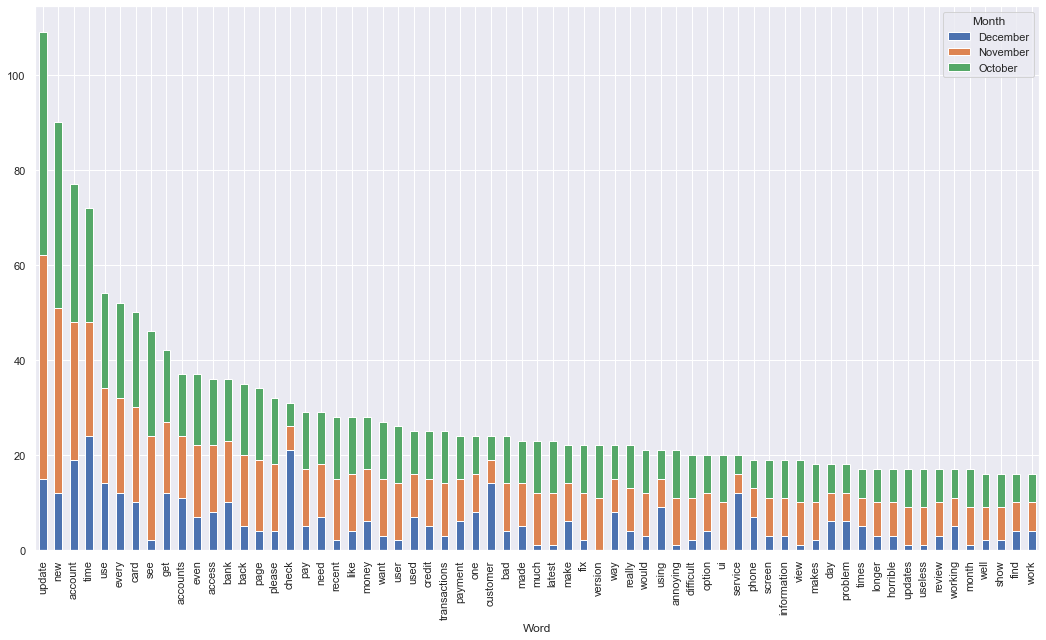

In [ ]:
#create stacked bar plot of crosstab formulated above
neg_trend_2020_tab.plot.bar(stacked=True)
plt.legend(title='Month')
plt.show()

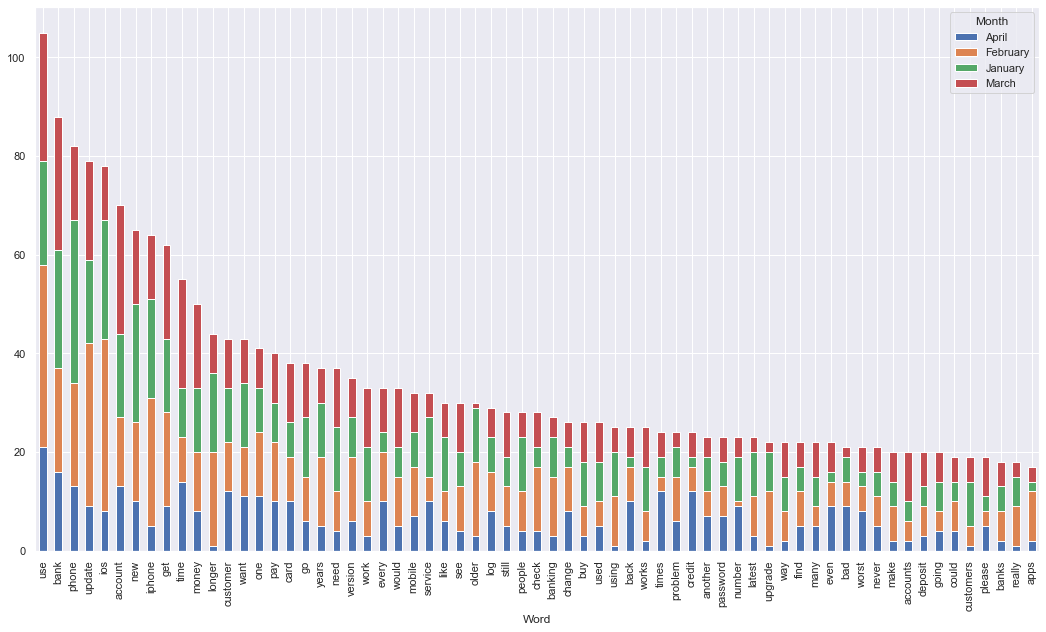

In [ ]:
#create stacked bar plot of crosstab formulated above
neg_trend_2021_tab.plot.bar(stacked=True)
plt.legend(title='Month')
plt.show()

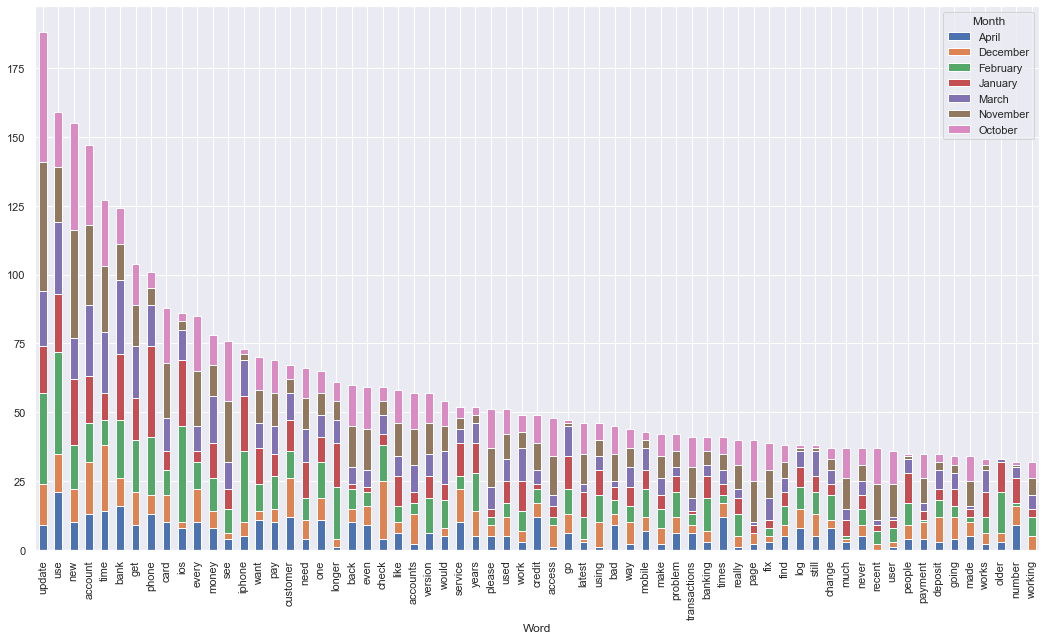

In [ ]:
#create stacked bar plot of crosstab formulated above
neg_trend_tab.plot.bar(stacked=True)
plt.legend(title='Month')
plt.show()

Update is the highest trending word, with it mostly trending it october and november. When looking up the word in october, the reviews have to do with problems and disatisfaction with the newest update. 
Problems with the October Update have to do with:
- new layout that limits app accessibility and easy user friendly design (front page/home screen layout)
    - "unneccessary, poor constant platform redesigns"
    - "unavoidable advertisements and promotions rather than the sleek look of information the previous version had"
    - extra taps to access indidvidual reports
    - way too much stuff thrown at you "information overload
    - inconvenient, unusuable
    - alot of advertisements on the home page
-it forces you to update everytime you update or else you cant access the app to check balance/deposit a check
- Wants to see list of my most recent pending charges and charges since my last statement, but new update removed feature/ hidden it
    - huge issue is not seeing transactions
    - The new update has limited options, not improved them.  I can no longer see recent transactions, available credit, etc. 
    - Downloaded the app for quick access to view card transactions unfortunately since this app was updated the only transactions you can view are payments.
- PErformance issues and lagging and crashing
- zelle pay functionaluty difficult to manage

In [ ]:
neg_oct[0:40]

,Word,Frequency,Month
0,update,47,October
1,new,39,October
2,account,29,October
3,time,24,October
4,see,22,October
5,every,20,October
6,card,20,October
7,use,20,October
8,page,15,October
9,get,15,October


In [ ]:
neg_nov[0:40]

,Word,Frequency,Month
0,update,47,November
1,new,39,November
2,account,29,November
3,time,24,November
4,see,22,November
5,every,20,November
6,card,20,November
7,use,20,November
8,page,15,November
9,get,15,November


In [ ]:
neg_dec[0:40]

,Word,Frequency,Month
0,time,24,December
1,check,21,December
2,account,19,December
3,update,15,December
4,customer,14,December
5,use,14,December
6,service,12,December
7,new,12,December
8,every,12,December
9,get,12,December


In [ ]:
neg_jan[0:40]

,Word,Frequency,Month
0,phone,33,January
1,ios,24,January
2,new,24,January
3,bank,24,January
4,use,21,January
5,iphone,20,January
6,account,17,January
7,update,17,January
8,longer,16,January
9,get,15,January


In [ ]:
neg_feb[0:40]

,Word,Frequency,Month
0,use,37,February
1,ios,35,February
2,update,33,February
3,iphone,26,February
4,phone,21,February
5,bank,21,February
6,get,19,February
7,longer,19,February
8,new,16,February
9,older,15,February


In [ ]:
neg_feb[0:40]

,Word,Frequency,Month
0,use,37,February
1,ios,35,February
2,update,33,February
3,iphone,26,February
4,phone,21,February
5,bank,21,February
6,get,19,February
7,longer,19,February
8,new,16,February
9,older,15,February


In [ ]:
neg_march[0:40]

,Word,Frequency,Month
0,bank,27,March
1,use,26,March
2,account,26,March
3,time,22,March
4,update,20,March
5,get,19,March
6,money,17,March
7,phone,15,March
8,new,15,March
9,iphone,13,March


In [ ]:
neg_april[0:40]

,Word,Frequency,Month
0,use,21,April
1,bank,16,April
2,time,14,April
3,phone,13,April
4,account,13,April
5,times,12,April
6,customer,12,April
7,credit,12,April
8,want,11,April
9,one,11,April


## <font color=green> Positive Sentiment

In [ ]:
pos_oct = chase_rev[(chase_rev["month"] == 10)&(chase_rev['year'] == 2020) & (chase_rev["v_pred"] == 1)]
pos_nov = chase_rev[(chase_rev["month"] == 11)&(chase_rev['year'] == 2020) & (chase_rev["v_pred"] == 1)]
pos_dec = chase_rev[(chase_rev["month"] == 12)&(chase_rev['year'] == 2020) & (chase_rev["v_pred"] == 1)]
pos_jan = chase_rev[(chase_rev["month"] == 1)&(chase_rev['year'] == 2021) & (chase_rev["v_pred"] == 1)]
pos_feb = chase_rev[(chase_rev["month"] == 2)&(chase_rev['year'] == 2021) & (chase_rev["v_pred"] == 1)]
pos_march = chase_rev[(chase_rev["month"] == 3)&(chase_rev['year'] == 2021) & (chase_rev["v_pred"] == 1)]
pos_april = chase_rev[(chase_rev["month"] == 4)&(chase_rev['year'] == 2021) & (chase_rev["v_pred"] == 1)]


In [ ]:
pos_oct.to_csv('pos_oct.csv')
pos_nov.to_csv('pos_nov.csv')
pos_dec.to_csv('pos_dec.csv')
pos_jan.to_csv('pos_jan.csv')
pos_feb.to_csv('pos_feb.csv')
pos_march.to_csv('pos_march.csv')
pos_april.to_csv('pos_april.csv')

In [ ]:
#read file from local
f_oct = open('pos_oct.csv','rU')
f_nov = open('pos_oct.csv','rU')
f_dec = open('pos_dec.csv','rU')
f_jan = open('pos_jan.csv','rU')
f_feb = open('pos_feb.csv','rU')
f_march = open('pos_march.csv','rU')
f_april = open('pos_april.csv','rU')

raw_oct = f_oct.read()
raw_nov = f_nov.read()
raw_dec = f_dec.read()
raw_jan = f_jan.read()
raw_feb = f_feb.read()
raw_march = f_march.read()
raw_april = f_april.read()

<ipython-input-253-4e2b1ef6f08c>:2: DeprecationWarning: 'U' mode is deprecated
  f_oct = open('pos_oct.csv','rU')
<ipython-input-253-4e2b1ef6f08c>:3: DeprecationWarning: 'U' mode is deprecated
  f_nov = open('pos_oct.csv','rU')
<ipython-input-253-4e2b1ef6f08c>:4: DeprecationWarning: 'U' mode is deprecated
  f_dec = open('pos_dec.csv','rU')
<ipython-input-253-4e2b1ef6f08c>:5: DeprecationWarning: 'U' mode is deprecated
  f_jan = open('pos_jan.csv','rU')
<ipython-input-253-4e2b1ef6f08c>:6: DeprecationWarning: 'U' mode is deprecated
  f_feb = open('pos_feb.csv','rU')
<ipython-input-253-4e2b1ef6f08c>:7: DeprecationWarning: 'U' mode is deprecated
  f_march = open('pos_march.csv','rU')
<ipython-input-253-4e2b1ef6f08c>:8: DeprecationWarning: 'U' mode is deprecated
  f_april = open('pos_april.csv','rU')


In [ ]:
#use built-in NLTK tokenization function to tokenize
tokens_oct = nltk.word_tokenize(raw_oct)
tokens_nov = nltk.word_tokenize(raw_nov)
tokens_dec = nltk.word_tokenize(raw_dec)
tokens_jan = nltk.word_tokenize(raw_jan)
tokens_feb = nltk.word_tokenize(raw_feb)
tokens_march = nltk.word_tokenize(raw_march)
tokens_april = nltk.word_tokenize(raw_april)

#change all tokens into lower case 
words_oct = [w.lower() for w in tokens_oct] 
words_nov = [w.lower() for w in tokens_nov]
words_dec = [w.lower() for w in tokens_dec] 
words_jan = [w.lower() for w in tokens_jan] 
words_feb = [w.lower() for w in tokens_feb] 
words_march = [w.lower() for w in tokens_march] 
words_april = [w.lower() for w in tokens_april]

words1_oct = []
for w in tokens_oct: 
    words1_oct.append(w.lower())
words1_nov = []
for w in tokens_nov: 
    words1_nov.append(w.lower())
words1_dec = []
for w in tokens_dec: 
    words1_dec.append(w.lower())
words1_jan = []
for w in tokens_jan: 
    words1_jan.append(w.lower())
words1_feb = []
for w in tokens_feb: 
    words1_feb.append(w.lower())
words1_march = []
for w in tokens_march: 
    words1_march.append(w.lower())
words1_april = []
for w in tokens_april: 
    words1_april.append(w.lower())
    
#only keep text words, no numbers 
words2_oct = [w for w in words1_oct if w.isalpha()]
words2_nov = [w for w in words1_nov if w.isalpha()]
words2_dec = [w for w in words1_dec if w.isalpha()]
words2_jan = [w for w in words1_jan if w.isalpha()]
words2_feb = [w for w in words1_feb if w.isalpha()]
words2_march = [w for w in words1_march if w.isalpha()]
words2_april = [w for w in words1_april if w.isalpha()]

#create a new list without stopwords 
words_nostopwords_oct = [w for w in words2_oct if w not in stopwords]
words_nostopwords_nov = [w for w in words2_nov if w not in stopwords]
words_nostopwords_dec = [w for w in words2_dec if w not in stopwords]
words_nostopwords_jan = [w for w in words2_jan if w not in stopwords]
words_nostopwords_feb = [w for w in words2_feb if w not in stopwords]
words_nostopwords_march = [w for w in words2_march if w not in stopwords]
words_nostopwords_april = [w for w in words2_april if w not in stopwords]


#Get the frequency distribution 
freq1_oct = FreqDist(words_nostopwords_oct)
freq1_nov = FreqDist(words_nostopwords_nov)
freq1_dec = FreqDist(words_nostopwords_dec)
freq1_jan = FreqDist(words_nostopwords_jan)
freq1_feb = FreqDist(words_nostopwords_feb)
freq1_march = FreqDist(words_nostopwords_march)
freq1_april = FreqDist(words_nostopwords_april)

#Sort the result
pos_oct_sorted_freq1 = sorted(freq1_oct.items(),key = lambda k: k[1], reverse = True)
pos_nov_sorted_freq1 = sorted(freq1_nov.items(),key = lambda k: k[1], reverse = True)
pos_dec_sorted_freq1 = sorted(freq1_dec.items(),key = lambda k: k[1], reverse = True)
pos_jan_sorted_freq1 = sorted(freq1_jan.items(),key = lambda k: k[1], reverse = True)
pos_feb_sorted_freq1 = sorted(freq1_feb.items(),key = lambda k: k[1], reverse = True)
pos_march_sorted_freq1 = sorted(freq1_march.items(),key = lambda k: k[1], reverse = True)
pos_april_sorted_freq1 = sorted(freq1_april.items(),key = lambda k: k[1], reverse = True)



In [ ]:
pos_oct = pd.DataFrame(neg_oct_sorted_freq1, columns =['Word', 'Frequency']) 
pos_nov = pd.DataFrame(neg_nov_sorted_freq1, columns =['Word', 'Frequency']) 
pos_dec = pd.DataFrame(neg_dec_sorted_freq1, columns =['Word', 'Frequency']) 
pos_jan = pd.DataFrame(neg_jan_sorted_freq1, columns =['Word', 'Frequency'])
pos_feb = pd.DataFrame(neg_feb_sorted_freq1 , columns =['Word', 'Frequency'])
pos_march= pd.DataFrame(neg_march_sorted_freq1, columns =['Word', 'Frequency'])
pos_april= pd.DataFrame(neg_april_sorted_freq1, columns =['Word', 'Frequency'])

In [ ]:
pos_oct.insert(loc = 2, column = 'Month', value = 'October')
pos_nov.insert(loc = 2, column = 'Month', value = 'November')
pos_dec.insert(loc = 2, column = 'Month', value = 'December')
pos_jan.insert(loc = 2, column = 'Month', value = 'January')
pos_feb.insert(loc = 2, column = 'Month', value = 'February')
pos_march.insert(loc = 2, column = 'Month', value = 'March')
pos_april.insert(loc = 2, column = 'Month', value = 'April')

In [ ]:
#frequency list to a bigger list
pos_trend_2020 = [pos_oct,pos_nov,pos_dec]
pos_trend_2021 = [pos_jan,pos_feb,pos_march,pos_april]
pos_trend = [pos_oct,pos_nov,pos_dec,pos_jan,pos_feb,pos_march,pos_april]

#create a dataframe from the combined year lists
pos_trend_2020 = pd.concat(pos_trend_2020)
pos_trend_2021 = pd.concat(pos_trend_2021)
pos_trend = pd.concat(pos_trend)

#reset index
pos_trend_2020 = pos_trend_2020.reset_index(drop = True)
pos_trend_2021 = pos_trend_2021.reset_index(drop = True)
pos_trend = pos_trend.reset_index(drop = True)


In [ ]:
#create crosstab between word and year, value is sum of frequency, sort by "All"
pos_trend_2020_tab = pd.crosstab(pos_trend_2020.Word,pos_trend_2020.Month,values=pos_trend_2020.Frequency,aggfunc="sum",margins=True).sort_values('All',ascending=False)
pos_trend_2020_tab = pos_trend_2020_tab.drop('All',axis=1) #drop All
pos_trend_2020_tab = pos_trend_2020_tab.drop('All',axis=0) #drop All
pos_trend_2020_tab = pos_trend_2020_tab[0:65] #only using up to 65 words


In [ ]:
#create crosstab between word and year, value is sum of frequency, sort by "All"
pos_trend_2021_tab = pd.crosstab(pos_trend_2021.Word,pos_trend_2021.Month,values=pos_trend_2021.Frequency,aggfunc="sum",margins=True).sort_values('All',ascending=False)
pos_trend_2021_tab = pos_trend_2021_tab.drop('All',axis=1) #drop All
pos_trend_2021_tab = pos_trend_2021_tab.drop('All',axis=0) #drop All
pos_trend_2021_tab = pos_trend_2021_tab[0:65] #only using up to 65 words

In [ ]:
pos_trend_tab = pd.crosstab(pos_trend.Word,pos_trend.Month,values=pos_trend.Frequency,aggfunc="sum",margins=True).sort_values('All',ascending=False)
pos_trend_tab = pos_trend_tab.drop('All',axis=1) #drop All
pos_trend_tab = pos_trend_tab.drop('All',axis=0) #drop All
pos_trend_tab = pos_trend_tab[0:65] #only using up to 65 words

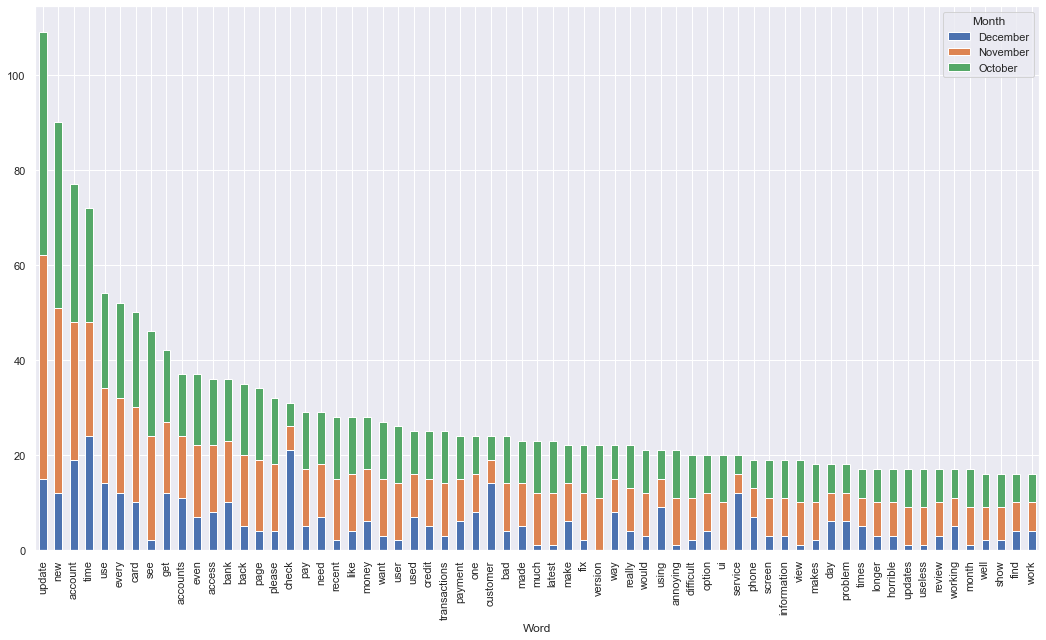

In [ ]:
#create stacked bar plot of crosstab formulated above
pos_trend_2020_tab.plot.bar(stacked=True)
plt.legend(title='Month')
plt.show()

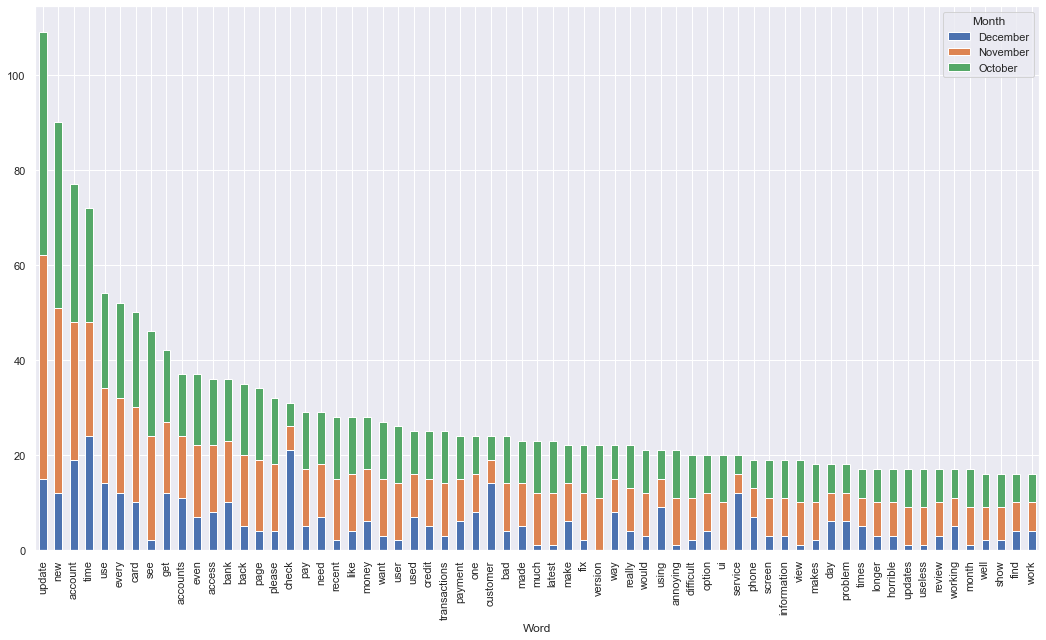

In [ ]:
#create stacked bar plot of crosstab formulated above
pos_trend_2020_tab.plot.bar(stacked=True)
plt.legend(title='Month')
plt.show()

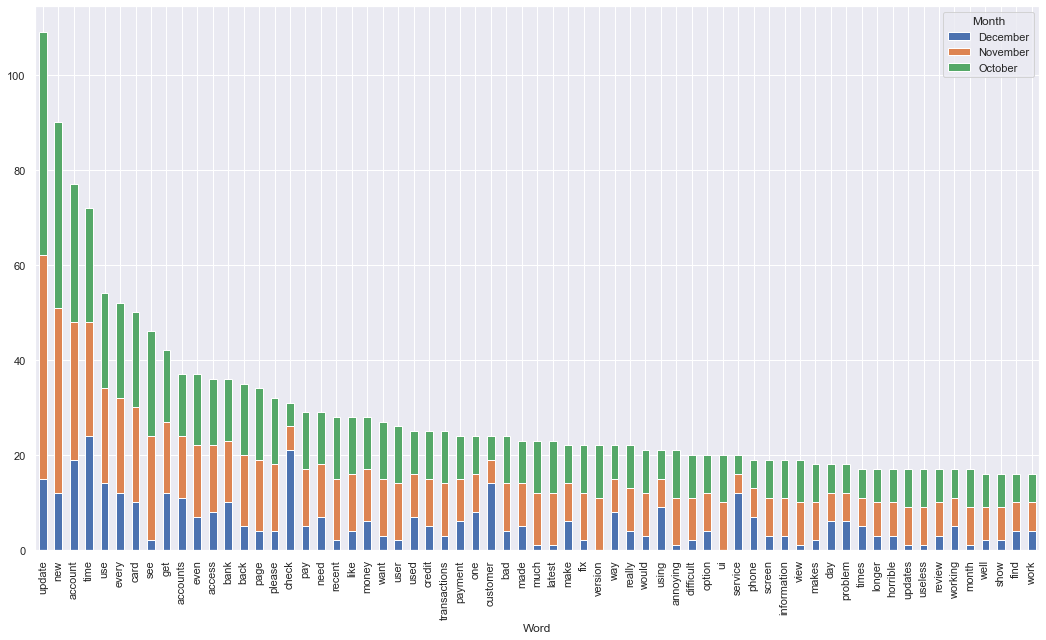

In [ ]:
#create stacked bar plot of crosstab formulated above
pos_trend_2020_tab.plot.bar(stacked=True)
plt.legend(title='Month')
plt.show()

In [ ]:
pos_oct[0:40]

,Word,Frequency,Month
0,update,47,October
1,new,39,October
2,account,29,October
3,time,24,October
4,see,22,October
5,every,20,October
6,card,20,October
7,use,20,October
8,page,15,October
9,get,15,October


In [ ]:
pos_nov[0:40]

,Word,Frequency,Month
0,update,47,November
1,new,39,November
2,account,29,November
3,time,24,November
4,see,22,November
5,every,20,November
6,card,20,November
7,use,20,November
8,page,15,November
9,get,15,November


In [ ]:
pos_dec[0:40]

,Word,Frequency,Month
0,time,24,December
1,check,21,December
2,account,19,December
3,update,15,December
4,customer,14,December
5,use,14,December
6,service,12,December
7,new,12,December
8,every,12,December
9,get,12,December


In [ ]:
pos_jan[0:40]

,Word,Frequency,Month
0,phone,33,January
1,ios,24,January
2,new,24,January
3,bank,24,January
4,use,21,January
5,iphone,20,January
6,account,17,January
7,update,17,January
8,longer,16,January
9,get,15,January


In [ ]:
pos_feb[0:40]

,Word,Frequency,Month
0,use,37,February
1,ios,35,February
2,update,33,February
3,iphone,26,February
4,phone,21,February
5,bank,21,February
6,get,19,February
7,longer,19,February
8,new,16,February
9,older,15,February


In [ ]:
pos_march[0:40]

,Word,Frequency,Month
0,bank,27,March
1,use,26,March
2,account,26,March
3,time,22,March
4,update,20,March
5,get,19,March
6,money,17,March
7,phone,15,March
8,new,15,March
9,iphone,13,March


In [ ]:
pos_april[0:40]

,Word,Frequency,Month
0,use,21,April
1,bank,16,April
2,time,14,April
3,phone,13,April
4,account,13,April
5,times,12,April
6,customer,12,April
7,credit,12,April
8,want,11,April
9,one,11,April
